In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize']= (12,8)






In [2]:
# Read in the data
#there was some unicode error
df= pd.read_csv("movies.csv", encoding= 'ISO-8859-1')

In [3]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
#Let's see if there is any mssing data

df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [5]:
#Data types for our columns
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [6]:
#changing budget and gross column data types
df['budget']=df.budget.astype('int64')
df['gross']=df.gross.astype('int64')
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016


In [7]:
df['actual_year']= df.released.str[0:4]

In [8]:
df


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,actual_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,2016


In [9]:
#highest grossing movie
df= df.sort_values(by=['gross'], inplace= False, ascending= False)

In [10]:
df.company.drop_duplicates().sort_values(ascending= False)


5288                        micro_scope
3486                           i5 Films
6084                               erbp
3225                     double A Films
2707        Zucker Brothers Productions
                     ...               
3527                          120 Films
5466              10th Hole Productions
2815                 101st Street Films
3208                 1+2 Seisaku Iinkai
3832    "DIA" Productions GmbH & Co. KG
Name: company, Length: 2179, dtype: object

In [11]:
df.drop_duplicates()
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,actual_year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


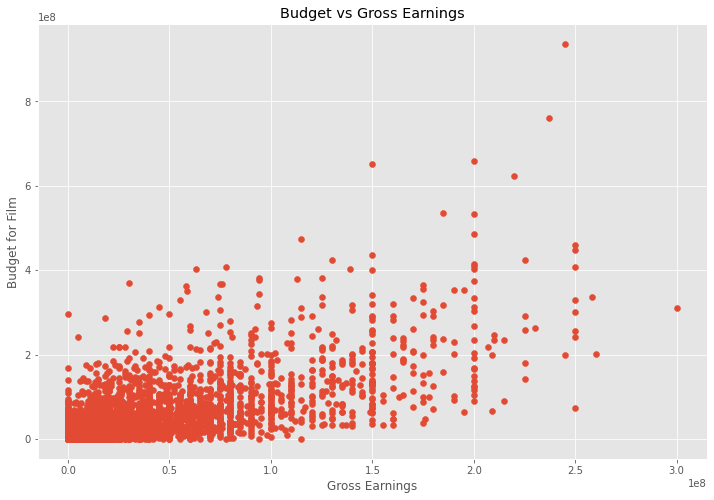

In [12]:
#Budget high correlation
#company high correlation
#Scatter plot with bidget vs gross

plt.scatter(df['budget'], df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel("Budget for Film")
plt.show


plt.show()

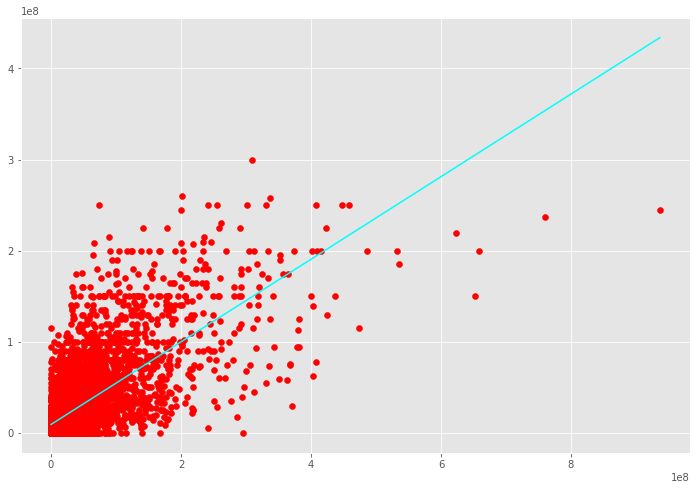

In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 

#scatter plot once again
plt.scatter(df.gross,df.budget, color= 'red')

#plotting linear regreession line(LSRL)

linreg= LinearRegression()
gross=df.gross.values.reshape(-1,1)
budget=df.budget.values.reshape(-1,1)

linreg.fit(gross,budget)
budget_pred= linreg.predict(gross)
plt.plot(gross,budget_pred, color= 'cyan')


plt.show()



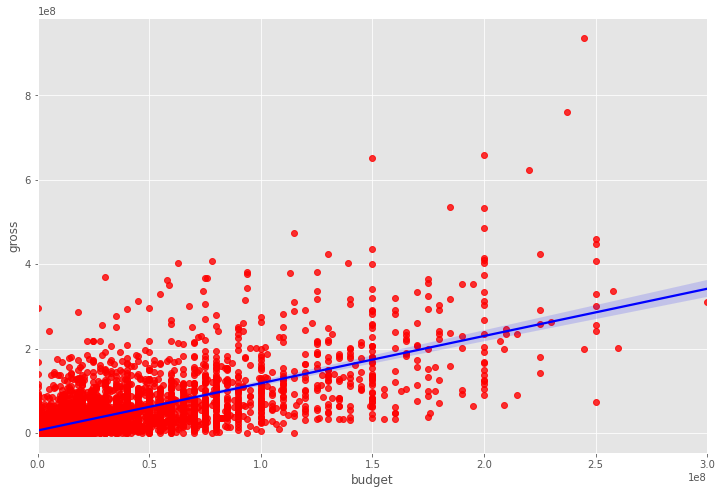

In [28]:
#Plot budget vs gross using seaborn
sns.regplot(x='budget',y='gross', data=df, scatter_kws= {'color': 'red'}, line_kws={"color":'blue'})

In [15]:
#Let's start looking at correlation

In [16]:
df.corr(method='pearson')#pearson, kendall, spearman
#highe correlation between budget and gross
#r=0.712, string, postive, linear corrlation

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


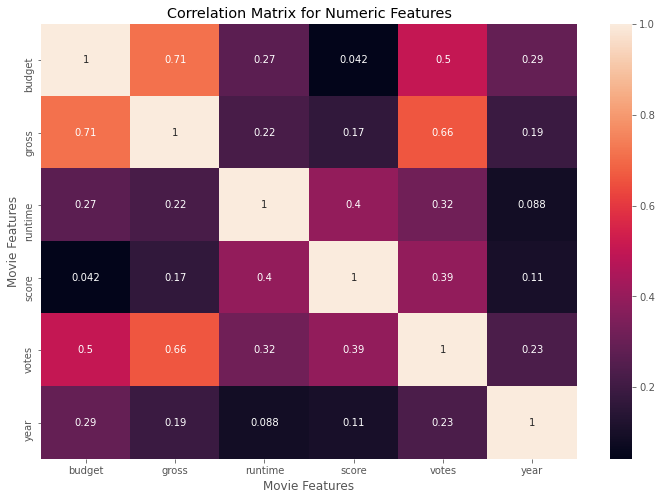

In [17]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel("Movie Features")

plt.show()

In [18]:
# Looks at company


In [19]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,actual_year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [20]:
df_numerized= df

for col_num in df_numerized.columns:
    if(df_numerized[col_num].dtype=='object'):
        df_numerized[col_num]=df_numerized[col_num].astype('category')
        df_numerized[col_num]=df_numerized[col_num].cat.codes
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,actual_year
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,2171,35,2071,0,547,2577,8,2059,104,7.2,748,16609,2981,2012,27
5699,0,1262,53,2385,4,542,5204,6,1977,89,6.2,1335,9018,2903,2011,26
6066,0,631,54,2484,5,441,2459,8,2125,106,5.7,1047,21070,2901,2013,28
2594,15000000,764,54,883,4,309,6257,7,895,84,5.7,2459,5034,217,1997,11


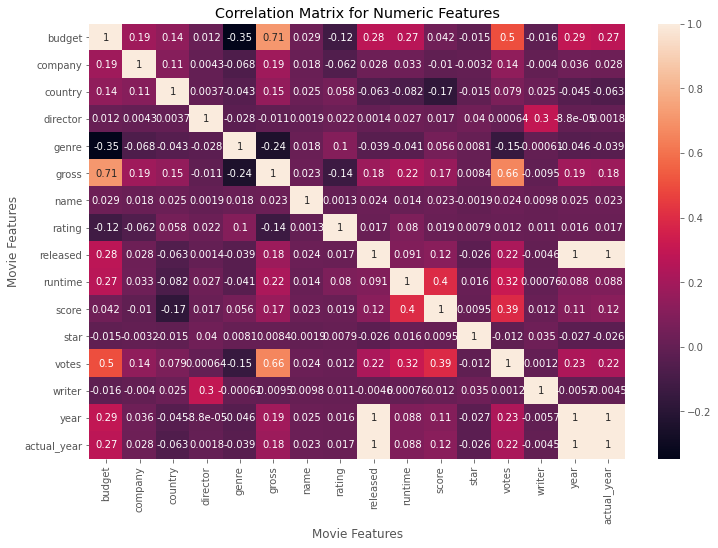

In [21]:
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel("Movie Features")

plt.show()

In [22]:
correlation_mat= df_numerized.corr()
corr_pairs= correlation_mat.unstack()
corr_pairs

budget       budget         1.000000
             company        0.187205
             country        0.137635
             director       0.011602
             genre         -0.346794
                              ...   
actual_year  star          -0.026050
             votes          0.220797
             writer        -0.004546
             year           0.996229
             actual_year    1.000000
Length: 256, dtype: float64

In [23]:
sorted_pairs= corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.346794
budget       genre         -0.346794
gross        genre         -0.242676
genre        gross         -0.242676
score        country       -0.174414
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
actual_year  actual_year    1.000000
Length: 256, dtype: float64

In [24]:
high_corr= sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
             budget         0.712196
budget       gross          0.712196
released     year           0.996187
year         released       0.996187
actual_year  year           0.996229
year         actual_year    0.996229
actual_year  released       0.999389
released     actual_year    0.999389
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
a

In [25]:
#Votes and budget have the highest correlation to gross earnings
#Company has low correction
#Alex the Analyst was wrong lmao

In [26]:
#groupby genre to find different summed values
df.groupby('genre').sum()

,budget,company,country,director,gross,name,rating,released,runtime,score,star,votes,writer,year,actual_year
genre,,,,,,,,,,,,,,,
0,65072329524,1818229.0,64428.0,1936794.0,74792634664,4497626.0,9837.0,1636416.0,145080,8127.2,1661240.0,149281325,2818336.0,2664099,20935.0
1,14622230000,545119.0,18551.0,564047.0,20895092830,1358447.0,2559.0,483733.0,42885,2491.1,486466.0,41594744,804730.0,784597,6163.0
2,17818500000,382964.0,12878.0,393036.0,25342203262,957613.0,1342.0,404524.0,25593,1868.9,324263.0,30401851,604682.0,555231,5180.0
3,6087181000,434412.0,16785.0,511756.0,8617526666,1117877.0,2643.0,498883.0,42342,2527.5,419994.0,25377361,768584.0,719218,6384.0
4,31038062491,2699832.0,103281.0,2918294.0,53543423603,6853297.0,14980.0,2300280.0,210517,12824.8,2664668.0,93087589,4470436.0,4159694,29284.0
5,8495949213,655146.0,24525.0,719783.0,10217836159,1699504.0,4048.0,608083.0,58004,3526.8,661686.0,44390166,1106787.0,1044234,7744.0
6,19153726000,1738407.0,64427.0,2053729.0,25204622256,4964393.0,10541.0,1737676.0,161615,9697.5,1799993.0,77093961,3035448.0,2889348,22185.0
7,119530000,16199.0,679.0,12220.0,118110208,40003.0,60.0,8020.0,1322,81.1,20420.0,93389,33008.0,27895,97.0
8,504442000,49019.0,1554.0,48591.0,644653115,123000.0,237.0,24637.0,3150,184.8,40179.0,1281050,73053.0,63853,309.0


In [25]:
df.groupby('genre').count()

,budget,company,country,director,gross,name,rating,released,runtime,score,star,votes,writer,year,actual_year
genre,,,,,,,,,,,,,,,
0,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331
1,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392
2,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277
3,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359
4,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080
5,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522
6,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444
7,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
8,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


In [26]:
#groupby genre to find different averaged value 
df.groupby('genre').mean()

,budget,company,country,director,gross,name,rating,released,runtime,score,star,votes,writer,year,actual_year
genre,,,,,,,,,,,,,,,
0,4.888980e+07,1366.062359,48.405710,1455.141998,5.619281e+07,3379.132983,7.390684,1229.463561,109.000751,6.106086,1248.114200,112157.268971,2117.457551,2001.577010,15.728775
1,3.730161e+07,1390.609694,47.323980,1438.895408,5.330381e+07,3465.426020,6.528061,1234.012755,109.400510,6.354847,1240.984694,106109.040816,2052.882653,2001.522959,15.721939
2,6.432671e+07,1382.541516,46.490975,1418.902527,9.148810e+07,3457.086643,4.844765,1460.375451,92.393502,6.746931,1170.624549,109753.974729,2182.967509,2004.444043,18.700361
3,1.695594e+07,1210.061281,46.754875,1425.504178,2.400425e+07,3113.863510,7.362117,1389.646240,117.944290,7.040390,1169.899721,70689.027855,2140.902507,2003.392758,17.782730
4,1.492215e+07,1297.996154,49.654327,1403.025962,2.574203e+07,3294.854327,7.201923,1105.903846,101.210096,6.165769,1281.090385,44753.648558,2149.248077,1999.852885,14.078846
5,1.627576e+07,1255.068966,46.982759,1378.894636,1.957440e+07,3255.754789,7.754789,1164.909962,111.118774,6.756322,1267.597701,85038.632184,2120.281609,2000.448276,14.835249
6,1.326435e+07,1203.882964,44.617036,1422.250000,1.745472e+07,3437.945291,7.299861,1203.376731,111.921745,6.715720,1246.532548,53389.169668,2102.110803,2000.933518,15.363573
7,8.537857e+06,1157.071429,48.500000,872.857143,8.436443e+06,2857.357143,4.285714,572.857143,94.428571,5.792857,1458.571429,6670.642857,2357.714286,1992.500000,6.928571
8,1.576381e+07,1531.843750,48.562500,1518.468750,2.014541e+07,3843.750000,7.406250,769.906250,98.437500,5.775000,1255.593750,40032.812500,2282.906250,1995.406250,9.656250
